<a href="https://colab.research.google.com/github/Kalash432/AspireNex/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data_path = '/content/creditcard.csv'
df = pd.read_csv(data_path)

In [4]:
# Check for missing values
df.isnull().sum()
df.describe()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Check class distribution
print(df['Class'].value_counts())

Class
0.000000    17836
1.000000       81
0.004521        1
Name: count, dtype: int64


In [6]:
# Remove classes with fewer than two samples
class_counts = df['Class'].value_counts()
rare_classes = class_counts[class_counts < 2].index
df = df[~df['Class'].isin(rare_classes)]

In [7]:
# Check the class distribution again
print("Class distribution after removing rare classes:")
print(df['Class'].value_counts())

Class distribution after removing rare classes:
Class
0.0    17836
1.0       81
Name: count, dtype: int64


<ipython-input-8-4e8f7e5a1ccf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


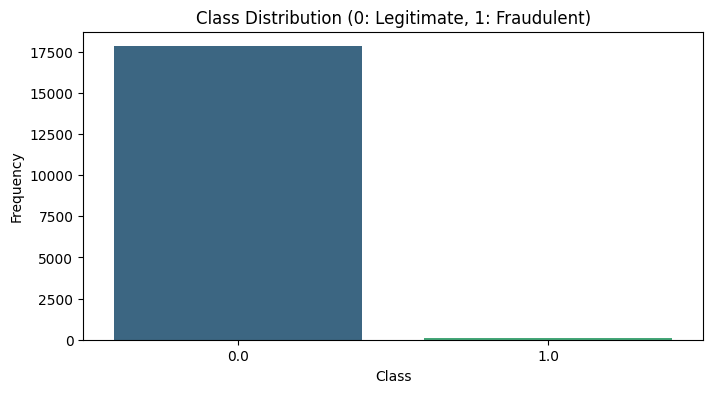

In [8]:
# Exploratory Data Analysis: Plot class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution (0: Legitimate, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Scale the 'Amount' and 'Time' features
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [10]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [13]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [14]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    print(name)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred))

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='roc_auc')
    print(f"Cross-validation AUC-ROC scores: {cv_scores}")
    print(f"Mean CV AUC-ROC: {cv_scores.mean()}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
[[3523   45]
 [   0   16]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3568
         1.0       0.26      1.00      0.42        16

    accuracy                           0.99      3584
   macro avg       0.63      0.99      0.70      3584
weighted avg       1.00      0.99      0.99      3584

AUC-ROC: 0.9936939461883407


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation AUC-ROC scores: [0.99901477 0.99852293 0.99795787 0.99789707 0.99904083]
Mean CV AUC-ROC: 0.9984866938732541

Decision Tree
[[3563    5]
 [   3   13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.72      0.81      0.76        16

    accuracy                           1.00      3584
   macro avg       0.86      0.91      0.88      3584
weighted avg       1.00      1.00      1.00      3584

AUC-ROC: 0.9055493273542601
Cross-validation AUC-ROC scores: [0.99947442 0.99912398 0.99982481 0.99912373 0.9994743 ]
Mean CV AUC-ROC: 0.9994042465288754

Random Forest
[[3565    3]
 [   1   15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.83      0.94      0.88        16

    accuracy                           1.00      3584
   macro avg       0.92      0.97      0.94      3584
weighted avg       1.00      1.00    

In [15]:
# Cross-validation
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC-ROC scores: {cv_scores}")
print(f"Mean CV AUC-ROC: {cv_scores.mean()}\n")

Cross-validation AUC-ROC scores: [1.         1.         1.         0.99998643 1.        ]
Mean CV AUC-ROC: 0.9999972858332038



In [16]:
# SHAP values for the Random Forest model
rf = models["Random Forest"]
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

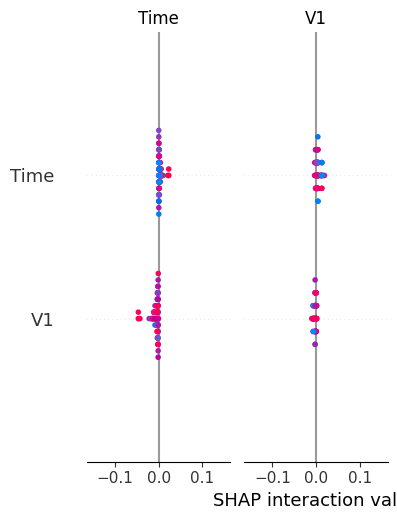

In [25]:
# Plot SHAP values for the positive class

shap.summary_plot(shap_values[:100], X_test[:100], max_display=5, plot_type="bar",show=False)

plt.show()